In [2]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Retrieve environment variables
key = os.getenv("DOCUMENT_INTELLIGENCE_KEY")
endpoint = os.getenv("DOCUMENT_INTELLIGENCE_ENDPOINT")

In [3]:
# import libraries
import os
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential

In [4]:
# sample image document
imagePath = "receipt-data/aeon.jpg"  # Can be .jpg, .jpeg, or .png

with open(imagePath, "rb") as f:
    document_analysis_client = DocumentAnalysisClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )

    poller = document_analysis_client.begin_analyze_document(
        "prebuilt-receipt", document=f  # Use "prebuilt-document" for general document analysis
    )
    
    result = poller.result()

In [5]:
result.pages

[DocumentPage(page_number=1, angle=0.016626760363578796, width=900.0, height=1600.0, unit=pixel, lines=[DocumentLine(content=AEON Alam Sutera, polygon=[Point(x=312.0, y=156.0), Point(x=529.0, y=160.0), Point(x=528.0, y=192.0), Point(x=312.0, y=184.0)], spans=[DocumentSpan(offset=0, length=16)]), DocumentLine(content=TEL : 021-50103359, polygon=[Point(x=300.0, y=188.0), Point(x=539.0, y=193.0), Point(x=538.0, y=226.0), Point(x=300.0, y=218.0)], spans=[DocumentSpan(offset=17, length=18)]), DocumentLine(content=NPWP: 03.220.091.7-077.000, polygon=[Point(x=230.0, y=221.0), Point(x=577.0, y=228.0), Point(x=577.0, y=260.0), Point(x=230.0, y=252.0)], spans=[DocumentSpan(offset=36, length=26)]), DocumentLine(content=TGL PENGUKUHAN: 2012/07/06, polygon=[Point(x=233.0, y=257.0), Point(x=575.0, y=258.0), Point(x=575.0, y=295.0), Point(x=232.0, y=291.0)], spans=[DocumentSpan(offset=63, length=26)]), DocumentLine(content=customer.hotline@aeonindonesia.co.id, polygon=[Point(x=163.0, y=288.0), Point(

In [6]:
result.documents

[AnalyzedDocument(doc_type=receipt.retailMeal, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=0.0, y=0.0), Point(x=900.0, y=0.0), Point(x=900.0, y=1600.0), Point(x=0.0, y=1600.0)])], spans=[DocumentSpan(offset=0, length=818)], fields={'Items': DocumentField(value_type=list, value=[DocumentField(value_type=dictionary, value={'Description': DocumentField(value_type=string, value='DAHLIA AF TK', content=DAHLIA AF TK, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=297.0, y=363.0), Point(x=457.0, y=364.0), Point(x=457.0, y=396.0), Point(x=297.0, y=395.0)])], spans=[DocumentSpan(offset=144, length=12)], confidence=0.98), 'Price': DocumentField(value_type=float, value=10800.0, content=10,800, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=353.0, y=398.0), Point(x=429.0, y=398.0), Point(x=429.0, y=428.0), Point(x=353.0, y=428.0)])], spans=[DocumentSpan(offset=184, length=6)], confidence=0.982), 'ProductCode': DocumentField(value_type=string

In [7]:
len(result.documents)

1

In [8]:
result.documents[0]

AnalyzedDocument(doc_type=receipt.retailMeal, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=0.0, y=0.0), Point(x=900.0, y=0.0), Point(x=900.0, y=1600.0), Point(x=0.0, y=1600.0)])], spans=[DocumentSpan(offset=0, length=818)], fields={'Items': DocumentField(value_type=list, value=[DocumentField(value_type=dictionary, value={'Description': DocumentField(value_type=string, value='DAHLIA AF TK', content=DAHLIA AF TK, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=297.0, y=363.0), Point(x=457.0, y=364.0), Point(x=457.0, y=396.0), Point(x=297.0, y=395.0)])], spans=[DocumentSpan(offset=144, length=12)], confidence=0.98), 'Price': DocumentField(value_type=float, value=10800.0, content=10,800, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=353.0, y=398.0), Point(x=429.0, y=398.0), Point(x=429.0, y=428.0), Point(x=353.0, y=428.0)])], spans=[DocumentSpan(offset=184, length=6)], confidence=0.982), 'ProductCode': DocumentField(value_type=string,

In [9]:
document = result.documents[0]

In [10]:
document.fields

{'Items': DocumentField(value_type=list, value=[DocumentField(value_type=dictionary, value={'Description': DocumentField(value_type=string, value='DAHLIA AF TK', content=DAHLIA AF TK, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=297.0, y=363.0), Point(x=457.0, y=364.0), Point(x=457.0, y=396.0), Point(x=297.0, y=395.0)])], spans=[DocumentSpan(offset=144, length=12)], confidence=0.98), 'Price': DocumentField(value_type=float, value=10800.0, content=10,800, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=353.0, y=398.0), Point(x=429.0, y=398.0), Point(x=429.0, y=428.0), Point(x=353.0, y=428.0)])], spans=[DocumentSpan(offset=184, length=6)], confidence=0.982), 'ProductCode': DocumentField(value_type=string, value='000008584441', content=000008584441, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=124.0, y=390.0), Point(x=284.0, y=396.0), Point(x=283.0, y=426.0), Point(x=124.0, y=420.0)])], spans=[DocumentSpan(offset=131, length=12)], c

In [11]:
type(document.fields)

dict

In [12]:
document.fields.keys()

dict_keys(['Items', 'MerchantName', 'MerchantPhoneNumber', 'Subtotal', 'TaxDetails', 'Total', 'TotalTax', 'TransactionDate', 'TransactionTime'])

In [13]:
document.fields["MerchantName"]

DocumentField(value_type=string, value='AEON Alam Sutera', content=AEON Alam Sutera, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=312.0, y=154.0), Point(x=530.0, y=160.0), Point(x=529.0, y=193.0), Point(x=311.0, y=187.0)])], spans=[DocumentSpan(offset=0, length=16)], confidence=0.971)

In [14]:
# Check if any documents were extracted
if len(result.documents) > 0:
    document = result.documents[0]  # Get the first document

    print("Receipt Fields:")
    
    # Merchant Name
    if document.fields.get("MerchantName"):
        print(f"Merchant Name: {document.fields['MerchantName'].value}")
    
    # Transaction Date
    if document.fields.get("TransactionDate"):
        print(f"Transaction Date: {document.fields['TransactionDate'].value}")
    
    # Total
    if document.fields.get("Total"):
        print(f"Total: {document.fields['Total'].value}")
    
    # Items
    if document.fields.get("Items"):
        print("Items:")
        for idx, item in enumerate(document.fields["Items"].value):
            print(f"  Item {idx + 1}:")
            if item.value.get("Description"):
                print(f"    Description: {item.value['Description'].value}")
            if item.value.get("TotalPrice"):
                print(f"    Total Price: {item.value['TotalPrice'].value}")

else:
    print("No receipts were extracted from the image.")

Receipt Fields:
Merchant Name: AEON Alam Sutera
Transaction Date: 2024-05-14
Total: 23000.0
Items:
  Item 1:
    Description: DAHLIA AF TK
    Total Price: 10800.0
  Item 2:
    Description: PLSA PANAS4ML
    Total Price: 8500.0
  Item 3:
    Description: PLSA CITRUS4ML
    Total Price: 8500.0
  Item 4:
    Description: SELECT CTTBD100
    Total Price: 5800.0


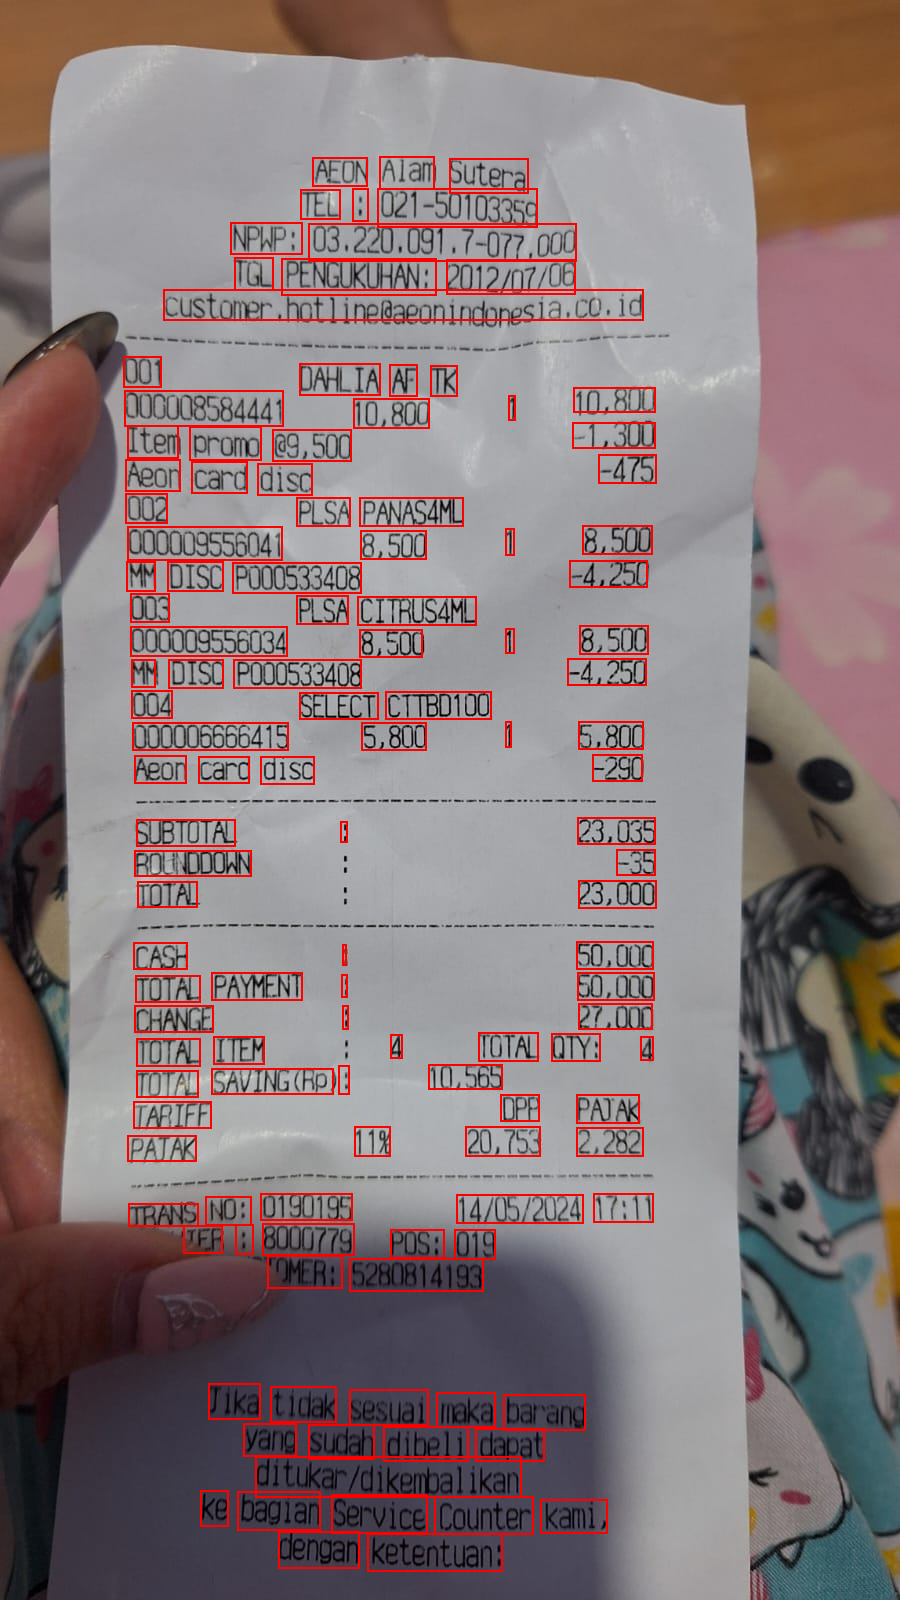

In [15]:
from PIL import Image, ImageDraw
from IPython.display import display

# Open the original image
image = Image.open(imagePath)
draw = ImageDraw.Draw(image)

# Draw bounding boxes for each word
for page in result.pages:
    for word in page.words:
        # Get bounding box coordinates
        x0, y0 = word.polygon[0].x, word.polygon[0].y
        x1, y1 = word.polygon[2].x, word.polygon[2].y
        
        # Draw rectangle
        draw.rectangle([x0, y0, x1, y1], outline="red", width=2)

# Save the image with bounding boxes
display(image)